In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# filter warnings
warnings.filterwarnings('ignore')

## Data (as numpy arrays and int)
x_train includes 60000 imgaes as numpy arrays y_train includes labels for those imgages

x_test includes 10000 imgaes as numpy arrays

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

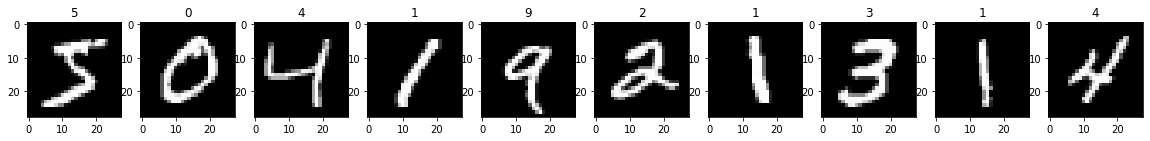

In [3]:
# plot some of the images 
plt.figure(figsize=(20, 10))
n = 10
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(tf.squeeze(x_train[i]), cmap = 'gray')
    plt.title(y_train[i])

## Preprocessing data

In [4]:
# normalize data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

# Reshape data into 28x28x1 3D matrices 
# (now we can set the input_shape inside tf.keras.layers.Conv2D as (28,28,1))
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

## Define a convolutional autoencoder

In [6]:
class Autoencoder(Model):
  def __init__(self):
    super().__init__()
    self.encoder = tf.keras.Sequential([
      layers.Conv2D(filters=16,  kernel_size=3, activation='relu', padding='same', strides=2, input_shape=(28, 28, 1)),
      layers.Conv2D(filters=8,  kernel_size=3, activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(filters=8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(filters=1, kernel_size=3, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [7]:
auto_encoder = Autoencoder()

## Compile and train the Autoencoder

In [20]:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
auto_encoder.compile(optimizer= Adam(learning_rate=0.005), loss=MeanSquaredError())

In [21]:
history = auto_encoder.fit(x_train, x_train,
                epochs=10,
                 batch_size=512,
                shuffle=True,
                validation_data=(x_test, x_test) )

Epoch 1/10
118/118 [==============================] - 21s 173ms/step - loss: 0.0101 - val_loss: 0.0018
Epoch 2/10
118/118 [==============================] - 22s 183ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/10
118/118 [==============================] - 23s 192ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 4/10
118/118 [==============================] - 22s 183ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
118/118 [==============================] - 22s 186ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
118/118 [==============================] - 22s 186ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/10
118/118 [==============================] - 22s 190ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/10
118/118 [==============================] - 24s 206ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/10
118/118 [==============================] - 25s 216ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/10
118/118 [==============================] - 26s 217ms/step - l

In [10]:
auto_encoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 7, 7, 8)           1320      
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         1897      
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [11]:
auto_encoder.encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [12]:
auto_encoder.decoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Visualization

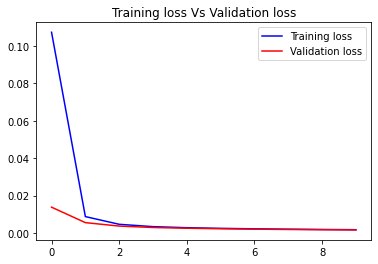

In [13]:
plt.plot(history.history['loss'],'b',label='Training loss')
plt.plot(history.history['val_loss'],'r',label='Validation loss')
plt.title('Training loss Vs Validation loss')
plt.legend()
plt.show()

In [14]:
# low dimensional representation (embedding) of the test set
encoded_imgs = auto_encoder.encoder(x_test).numpy()
# reconstructed test set
decoded_imgs = auto_encoder.decoder(encoded_imgs).numpy()
decoded_imgs.shape

(10000, 28, 28, 1)

In [15]:
encoded_imgs.shape

(10000, 7, 7, 8)

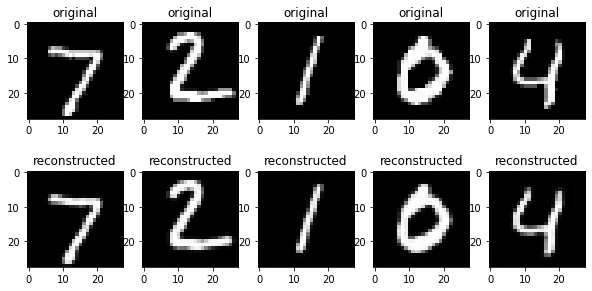

In [26]:
plt.figure(figsize=(10, 5))

for i in range(5):
    # display original 
    plt.subplot(2, 5, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]),cmap = 'gray')

    # display reconstruction
    plt.subplot(2, 5, i + 5 + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]),cmap = 'gray')
plt.show()

## Lets have some fun
We have computed the low-dimensional embeddings of the test images and stored them in encoded_imgs.

Now, lets interpolate between two embeddings and decode them. You will see a smooth transition between the two images!


In [82]:
encoded_interpolants = np.zeros_like(encoded_imgs[0:10])
for i in range(0, 10):
    encoded_interpolants[i] = encoded_imgs[26] * (i/10) + encoded_imgs[24] * (10-i)/10
encoded_interpolants.shape

(10, 7, 7, 8)

In [83]:
decoded_interpolants = auto_encoder.decoder(encoded_interpolants).numpy()

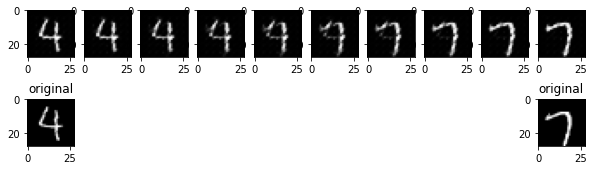

In [84]:
plt.figure(figsize=(10, 3))

for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(tf.squeeze(decoded_interpolants[i]),cmap = 'gray')

plt.subplot(2, 10, 11)
plt.title('original')
plt.imshow(tf.squeeze(x_test[24]),cmap = 'gray')
plt.subplot(2, 10, 20)
plt.title('original')
plt.imshow(tf.squeeze(x_test[26]),cmap = 'gray')